In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:

import numpy as np
# Function to calculate claim amount based on damage percentage
def calculate_claim(damage_percentage):
    base_amount = 10000  # Base amount for 100% damage
    claim_amount = (damage_percentage / 100) * base_amount
    return claim_amount

# Function to detect damage and calculate claim amount based on model output
def detect_damage(image_path):
    try:
        # Perform inference using the trained model
        results = model(image_path)

        # Annotate the image with bounding boxes
        annotated_image = results[0].plot()

        # Convert the annotated image to a format suitable for processing
        img = cv2.cvtColor(np.array(annotated_image), cv2.COLOR_RGB2BGR)
        total_image_area = img.shape[0] * img.shape[1]  # Total image area (width * height)

        damage_area = 0
        for box in results[0].boxes.xyxy:  # Iterate over detected bounding boxes
            x1, y1, x2, y2 = box[:4]  # Extract box coordinates
            box_area = (x2 - x1) * (y2 - y1)  # Area of the bounding box
            damage_area += box_area  # Sum all damage areas

        # Calculate damage percentage
        damage_percentage = (damage_area / total_image_area) * 100

        # Calculate the claim amount based on damage percentage
        claim_amount = calculate_claim(damage_percentage)

        # Display the annotated image
        cv2_imshow(img)  # Show image in Colab

        # Optionally, you can also save the image to a file
        cv2.imwrite('annotated_image.jpg', img)  # Save image to file

        # Print the damage percentage and claim amount
        print(f"Damage Percentage: {damage_percentage:.2f}%")
        print(f"Claim Amount: ₹{claim_amount:.2f}")

    except Exception as e:
        print(f"An error occurred: {e}")


In [ ]:
def load_model(model_path):
    """Loads the specified object detection model.

    Args:
        model_path (str): Path to the pre-trained model weights.

    Returns:
        object: Loaded object detection model object (replace with your model's logic)
    """
    # Load the YOLOv8 model from the specified path
    model = YOLO(model_path)
    return model

Saving image 12.jpg to image 12.jpg

image 1/1 /content/image 12.jpg: 480x640 3 dents, 1 scratch, 189.4ms
Speed: 3.4ms preprocess, 189.4ms inference, 5.5ms postprocess per image at shape (1, 3, 480, 640)


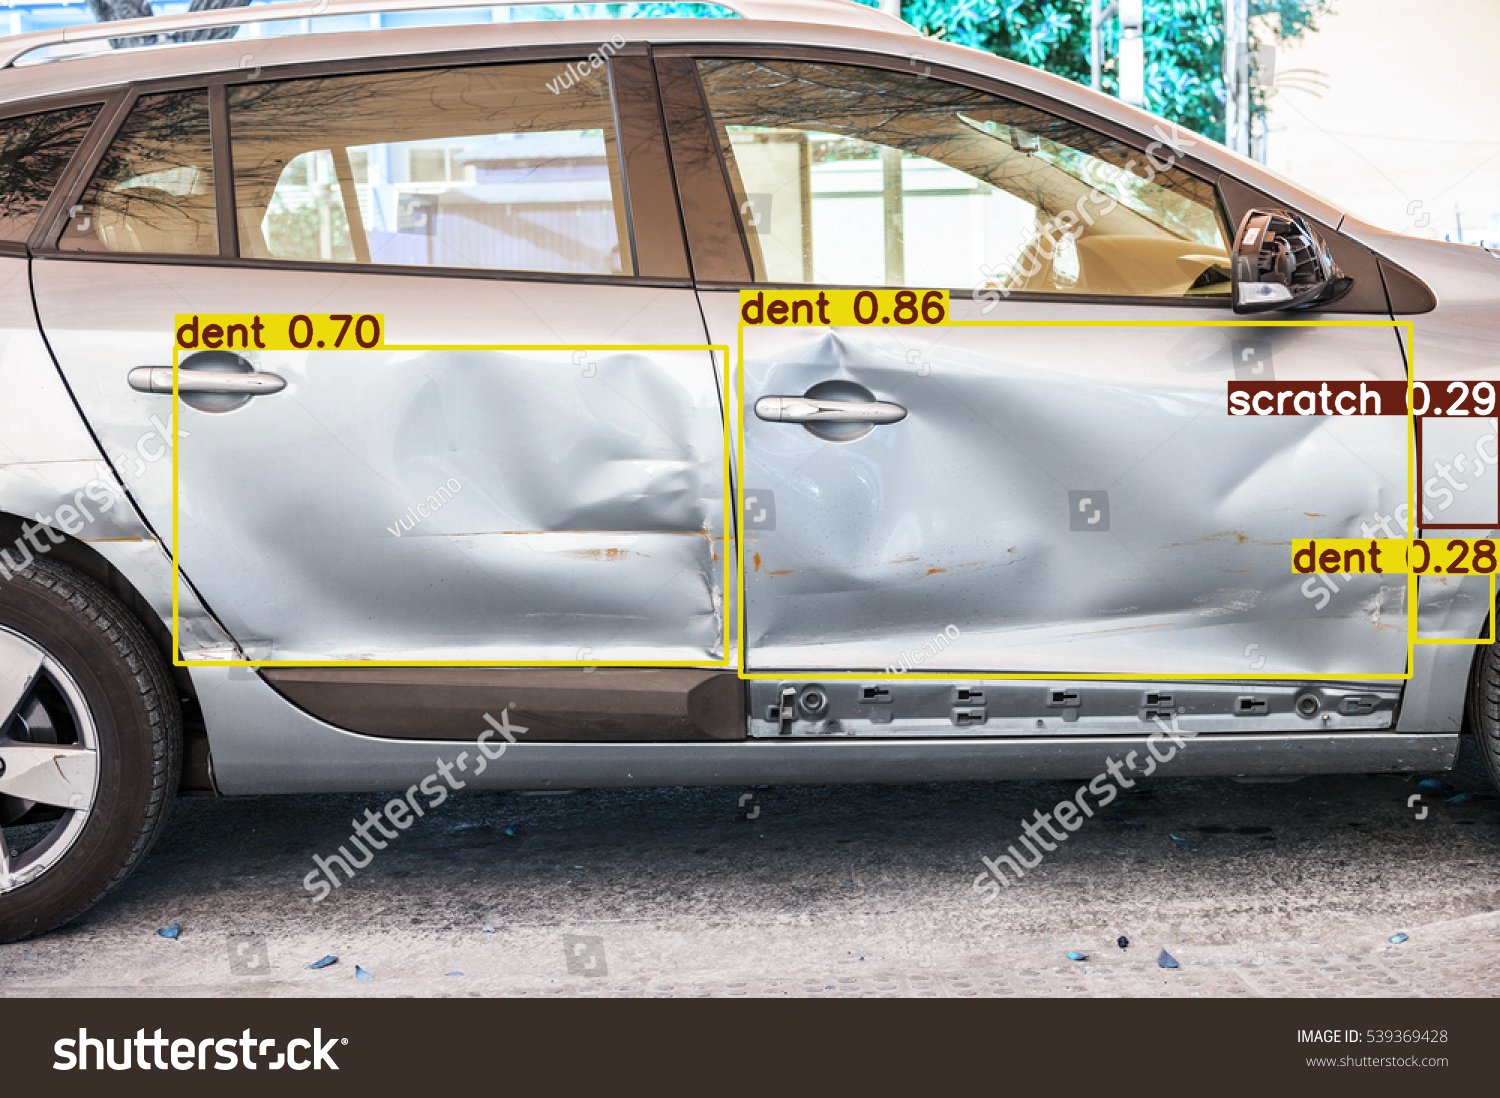

Damage Percentage: 25.80%
Claim Amount: ₹2580.07


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload()
model = load_model("/content/best.pt")
# Run the detection function on the uploaded image

for image_name in uploaded.keys():
    detect_damage(image_name)



In [ ]:
  model.save("claim.h5")